# Bike Sharing Demand Prediction

This notebook contains the code for analyzing the dataset, building a multiple linear regression model, and evaluating its performance.

In [3]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


## Load the Dataset

In [5]:

# Load the dataset
file_path = 'day.csv'
bike_data = pd.read_csv(file_path)
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Preprocessing

In [7]:

# Mapping for season and weathersit based on the data dictionary
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_map = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Convert season and weathersit to categorical labels
bike_data['season'] = bike_data['season'].map(season_map)
bike_data['weathersit'] = bike_data['weathersit'].map(weathersit_map)

# Drop irrelevant columns
bike_data_cleaned = bike_data.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Create dummy variables for categorical features
bike_data_encoded = pd.get_dummies(bike_data_cleaned, drop_first=True)

# Split the data into features (X) and target (y)
X = bike_data_encoded.drop(columns=['cnt'])
y = bike_data_encoded['cnt']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build and Evaluate the Model

In [9]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.8521
Mean Squared Error: 506297.0172


## Residual Analysis

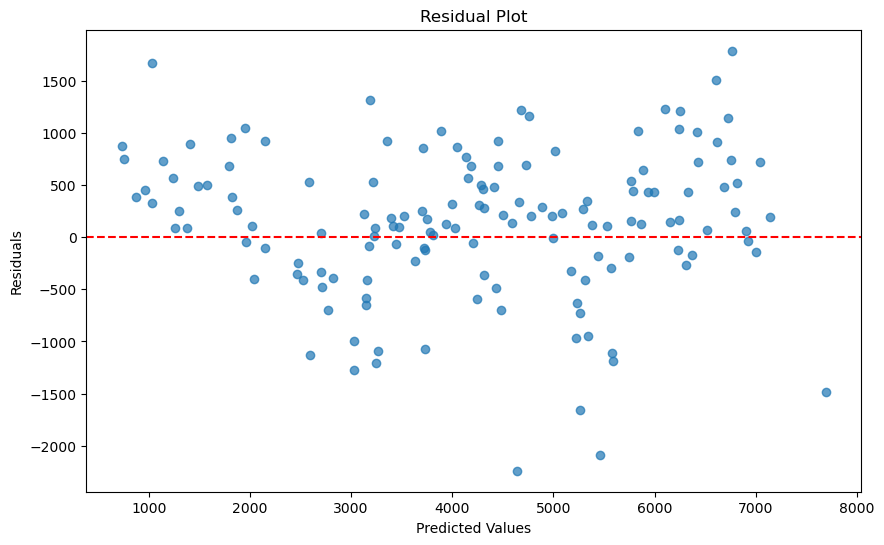

In [11]:

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## Feature Importance

In [13]:

# Extract feature coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_coefficients.head(10)


,Feature,Coefficient
0,yr,1987.528872
11,season_Winter,802.730631
10,season_Summer,245.221851
4,workingday,134.016348
5,temp,100.044562
3,weekday,67.858245
6,atemp,23.174857
7,hum,-10.606921
1,mnth,-28.498682
8,windspeed,-41.981107
